In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['message'][3]

'U dun say so early hor... U c already then say...'

# EDA

In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

this steps helps to choose the feature for you data this steps is called feature engineering this will help tocrete optimistic feature for our machine learning model

In [8]:
df['length'] = df['message'].apply(len)

In [9]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visulization

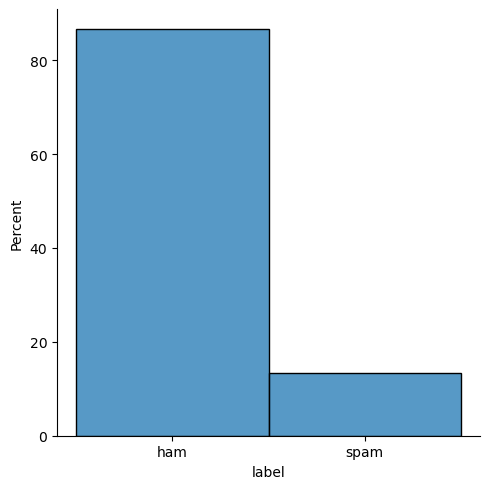

In [10]:
sns.displot(df,x = df['label'],fill=True,stat="percent")

<Axes: xlabel='length', ylabel='Percent'>

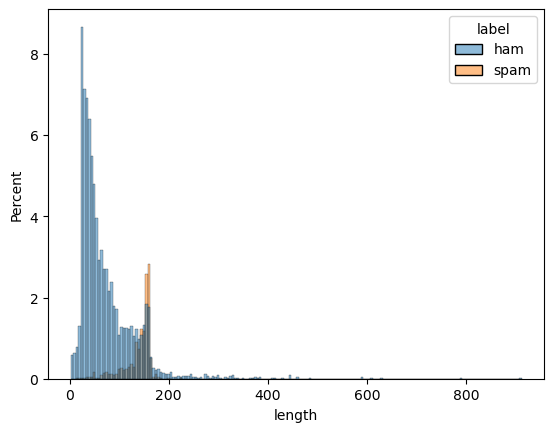

In [11]:
sns.histplot(data=df,x=df['length'],bins=100,hue=df['label'],stat='percent',binwidth=5)

In [12]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [13]:
#getting those message which  have length 910
df[df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# Text Preprocessing

Remove stopword

remove the punctutatuion

lemmatization and tokenization

In [14]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import nltk
from nltk.corpus import stopwords
st = stopwords.words('english')

In [16]:
tx = df['message'][2]

In [17]:
df['message'].str.lower()

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
tx

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [20]:
import re
re.sub('[0-9]','',tx)

"Free entry in  a wkly comp to win FA Cup final tkts st May . Text FA to  to receive entry question(std txt rate)T&C's apply over's"

In [21]:
def text_preproces(text):
    
    text=text.lower()
    
    #remmoving the punctuation from the data
    nonpunc=[char for char in text if char not in string.punctuation]
    nonpunc=''.join(nonpunc)
    
    #apply the regex to reomvoe the number
    txt=re.sub('[0-9]','',nonpunc)
    
    #removing the stopwords
    
    no_stopwords=[word for word in txt.split() if word not in stopwords.words('english')]
    
    return no_stopwords
     
    

In [22]:
df['message'][:10].apply(text_preproces)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
5    [freemsg, hey, darling, weeks, word, back, id,...
6    [even, brother, like, speak, treat, like, aids...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, valued, network, customer, selected, ...
9    [mobile, months, u, r, entitled, update, lates...
Name: message, dtype: object

In [23]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# vectorization

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_transformer = CountVectorizer(analyzer=text_preproces).fit(df['message'])

In [26]:
bow_transformer

CountVectorizer(analyzer=<function text_preproces at 0x0000014FE13FEDE0>)

In [27]:
len(bow_transformer.vocabulary_)

8576

In [28]:
bow_transformer.vocabulary_

{'go': 2857,
 'jurong': 3762,
 'point': 5509,
 'crazy': 1553,
 'available': 479,
 'bugis': 935,
 'n': 4755,
 'great': 2953,
 'world': 8285,
 'la': 3919,
 'e': 2087,
 'buffet': 933,
 'cine': 1269,
 'got': 2914,
 'amore': 242,
 'wat': 8040,
 'ok': 5063,
 'lar': 3955,
 'joking': 3730,
 'wif': 8177,
 'u': 7702,
 'oni': 5095,
 'free': 2641,
 'entry': 2221,
 'wkly': 8237,
 'comp': 1385,
 'win': 8191,
 'fa': 2359,
 'cup': 1611,
 'final': 2485,
 'tkts': 7472,
 'st': 6873,
 'may': 4401,
 'text': 7305,
 'receive': 5920,
 'questionstd': 5810,
 'txt': 7684,
 'ratetcs': 5864,
 'apply': 331,
 'overs': 5198,
 'dun': 2073,
 'say': 6275,
 'early': 2093,
 'hor': 3288,
 'c': 982,
 'already': 215,
 'nah': 4761,
 'dont': 1978,
 'think': 7380,
 'goes': 2870,
 'usf': 7838,
 'lives': 4123,
 'around': 382,
 'though': 7401,
 'freemsg': 2649,
 'hey': 3184,
 'darling': 1674,
 'weeks': 8097,
 'word': 8271,
 'back': 526,
 'id': 3408,
 'like': 4073,
 'fun': 2716,
 'still': 6944,
 'tb': 7232,
 'xxx': 8414,
 'std': 69

In [29]:
message4 = df['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [30]:
bow4=bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 215)	1
  (0, 982)	1
  (0, 2073)	1
  (0, 2093)	1
  (0, 3288)	1
  (0, 6275)	2
  (0, 7702)	2
(1, 8576)


In [31]:
print(bow_transformer.get_feature_names_out()[6275])
print(bow_transformer.get_feature_names_out()[7702])

say
u


In [ ]:
#applying the vectorizer object to ntire data frame

message_bow = bow_transformer.transform(df['message'])

In [ ]:
print('Shape of Sparse Matrix: ', message_bow.shape)
print('Amount of Non-Zero occurences: ', message_bow.nnz)

In [ ]:
message_bow.shape[1]

In [ ]:
sparsity = (100.0 * message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

## TFIDF transformer


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf=TfidfTransformer().fit(message_bow)#message_bow is the object of the bag of words transofmre of all corpus

In [ ]:
tfidf

In [ ]:
print(tfidf.transform(bow4))


In [ ]:
message4 = df['message'][3]
print(message4)

In [ ]:
bow4=bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

In [ ]:
print(bow_transformer.get_feature_names_out()[6275])
print(bow_transformer.get_feature_names_out()[7702])

In [ ]:
message4 = df['message'][3]
print(message4)

In [ ]:
bow4=bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

Transform the enire Bag of words corpus to tfidf corpus

In [ ]:
msgtfidf = tfidf.transform(message_bow)
print(msgtfidf.shape)

In [ ]:
print(message_bow[:3])

# Traning a model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(msgtfidf,df['label'],test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)

In [ ]:
spam_detect_model = MultinomialNB()
spam_detect_model.fit(X_train,y_train)

In [ ]:
pred = spam_detect_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

# Creating the DataPipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

In [ ]:
pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=text_preproces)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
pipe.fit(msg_train,label_train)

In [ ]:
predict = pipe.predict(msg_test)

In [ ]:
print(classification_report(predict,label_test))

In [158]:
import pickle

# Assuming 'pipe' is the object you want to serialize and save
with open('pipe.pkl', 'wb') as file:
    pickle.dump(pipe, file)


# Understanfing some concept

In [89]:
def text_proces(text):
    
    #text=text.lower()
    
    #remmoving the punctuation from the data
    nonpunc=[char for char in text if char not in string.punctuation]
    nonpunc=''.join(nonpunc)
    
    #apply the regex to reomvoe the number
    txt=re.sub('[0-9]','',nonpunc)
    
    #removing the stopwords
    
    no_stopwords=[word for word in txt.split() if word.lower() not in stopwords.words('english')]
    
    return ' '.join(no_stopwords)

In [90]:
msg = df['message'].apply(text_proces)

In [91]:
msg

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts st ...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    nd time tried contact u U £ Pound prize claim ...
5568                          ü b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: message, Length: 5572, dtype: object

In [92]:
cv=CountVectorizer()

cv.fit_transform(msg)

<5572x8501 sparse matrix of type '<class 'numpy.int64'>'
	with 45680 stored elements in Compressed Sparse Row format>

In [93]:
cv.vocabulary_

{'go': 2839,
 'jurong': 3730,
 'point': 5481,
 'crazy': 1541,
 'available': 479,
 'bugis': 932,
 'great': 2935,
 'world': 8245,
 'la': 3885,
 'buffet': 930,
 'cine': 1259,
 'got': 2896,
 'amore': 242,
 'wat': 8002,
 'ok': 5033,
 'lar': 3921,
 'joking': 3698,
 'wif': 8137,
 'oni': 5065,
 'free': 2624,
 'entry': 2206,
 'wkly': 8197,
 'comp': 1375,
 'win': 8151,
 'fa': 2342,
 'cup': 1599,
 'final': 2468,
 'tkts': 7438,
 'st': 6842,
 'may': 4368,
 'text': 7273,
 'receive': 5889,
 'questionstd': 5780,
 'txt': 7650,
 'ratetcs': 5833,
 'apply': 331,
 'overs': 5168,
 'dun': 2058,
 'say': 6243,
 'early': 2078,
 'hor': 3268,
 'already': 215,
 'nah': 4731,
 'dont': 1965,
 'think': 7346,
 'goes': 2852,
 'usf': 7803,
 'lives': 4090,
 'around': 382,
 'though': 7367,
 'freemsg': 2632,
 'hey': 3165,
 'darling': 1662,
 'weeks': 8060,
 'word': 8231,
 'back': 524,
 'id': 3388,
 'like': 4040,
 'fun': 2699,
 'still': 6913,
 'tb': 7200,
 'xxx': 8373,
 'std': 6888,
 'chgs': 1204,
 'send': 6339,
 'rcv': 5845,

In [94]:
msg4 = df['message'][3]
print(msg4)

U dun say so early hor... U c already then say...


In [99]:
bo4=bow_transformer.transform([msg4])
print(bo4)
print(bo4.shape)

  (0, 215)	1
  (0, 982)	1
  (0, 2073)	1
  (0, 2093)	1
  (0, 3288)	1
  (0, 6275)	2
  (0, 7702)	2
(1, 8576)


This will work same as above format we use 


but using the analyzer is the best way to use